# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [Timo Widyanvolta]
- **Email:** [timo.widyanvolta-2021@ftmm.unair.ac.id]
- **ID Dicoding:** [tamtemtom]

## Menentukan Pertanyaan Bisnis

- How is the trend of bike rentals per month?
- What is the influence of seasons on bike rentals?
- At what time do bike rentals peak?
- What is the trend of the casual users and registered users percentage?

## Import Semua Packages/Library yang Digunakan

In [2]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

## Data Wrangling

#### Gathering Data

In [3]:
data_dir = 'data'
# Read Day Datasets
df_day = pd.read_csv(os.path.join(data_dir, 'day.csv'))
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# Read Hour Datasets
df_hour = pd.read_csv(os.path.join(data_dir, 'hour.csv'))
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
# Read Txt Files
with open(os.path.join(data_dir, "Readme.txt"), 'r') as F:
  metadata = F.read()
print(metadata)

Bike Sharing Dataset

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


Background 

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of tra

#### Assesing Data

In [6]:
# Check null value
print(f"Null value in day dataset : {df_day.isna().any().any()}")
print(f"Null value in hour dataset : {df_hour.isna().any().any()}")

Null value in day dataset : False
Null value in hour dataset : False


There is no value in this dataset so we don't have to drop of impute value

In [7]:
# Check duplicated value
print(f"Duplicate value in day dataset : {df_day.duplicated().any().any()}")
print(f"Duplicate value in hour dataset : {df_hour.duplicated().any().any()}")

Duplicate value in day dataset : False
Duplicate value in hour dataset : False


There is also no duplicate value in this dataset so we don't have to `drop_duplicates`

In [8]:
# Check data dtype
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


<b>df_day</b> have a total of 16 columns. All datatypes of the columns make sense to its attribute. <br><b>dteday</b> have object dtype because it is a timeframe object

In [9]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


<b>df_day</b> have a total of 17 columns. It has one additional column from df_day that is <b>hour</b>. <br>All datatypes of the columns also make sense to its attribute.

## Exploratory Data Analysis (EDA)

#### Explore basic stats

In [10]:
# Check dataset basic stats
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Merge Datasets

In [23]:
def merge_df(df_day, df_hour):
  df_day = df_day.copy()
  df_hour = df_hour.copy()

  day_measure = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
  day_measure_dict = {x:f"{x}_day" for x in day_measure}
  df_day.rename(columns=day_measure_dict, inplace=True)

  drop_measure = [x for x in df_day.columns if x not in day_measure_dict.values()]
  drop_measure.remove('dteday')
  df_day.drop(drop_measure, axis=1, inplace=True)

  df_merge = pd.DataFrame(df_hour.merge(df_day, on="dteday", how="left"))

  return df_merge

In [24]:
df_merge = merge_df(df_day, df_hour)
df_merge

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,casual,registered,cnt,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,3,13,16,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,8,32,40,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,5,27,32,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,3,10,13,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0,1,1,0.344167,0.363625,0.805833,0.160446,331,654,985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,...,11,108,119,0.215833,0.223487,0.577500,0.154846,439,2290,2729
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,...,8,81,89,0.215833,0.223487,0.577500,0.154846,439,2290,2729
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,...,7,83,90,0.215833,0.223487,0.577500,0.154846,439,2290,2729
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,...,13,48,61,0.215833,0.223487,0.577500,0.154846,439,2290,2729


## Visualization & Explanatory Analysis

#### Pertanyaan 1:  `Bagaimana tren peminjaman sepeda per bulan?`

In [25]:
# Buat grafik tren peminjaman per bulan
int_to_month = {
    1: 'Jan', 2: 'Feb', 3: 'Mar',
    4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep',
    10: 'Oct', 11: 'Nov', 12: 'Dec',
}

int_to_year = {
    0: 2011,
    1: 2012
}

def plot_monthly(df:pd.DataFrame, col='cnt', return_df=False):
  df = df.copy()
  df.sort_values(['yr', 'mnth'], inplace=True)
  df['mnth_str'] = df['mnth'].apply(lambda x : int_to_month[x])
  df['yr'] = df['yr'].apply(lambda x : str(int_to_year[x]))
  df['yr_mnth'] = df['mnth_str']  + ', ' + df['yr']

  df_mnth_col = df.groupby('yr_mnth').mean(numeric_only=True)[col]
  df[f'mnth_{col}'] = df['yr_mnth'].apply(lambda x : df_mnth_col[x])
  df_result = df[['yr_mnth', f'mnth_{col}']].set_index('yr_mnth')
  # return df_result

  if return_df:
    return df_result

  lineplot = sns.lineplot(df_result[f'mnth_{col}'])
  lineplot.tick_params(axis='x', rotation=90)


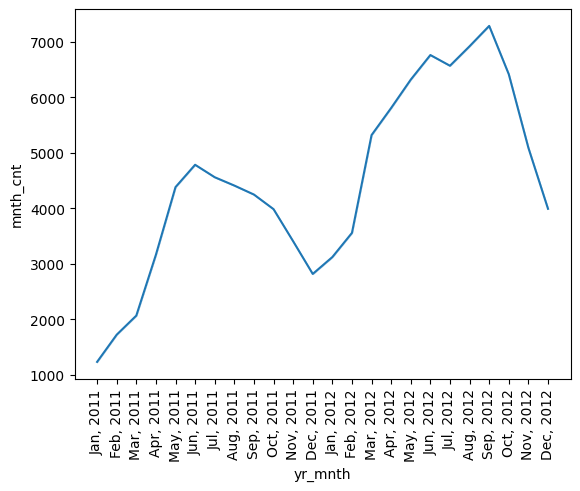

In [26]:
plot_monthly(df_day, col='cnt')

 Bisa dilihat bahwa trend banyak pengendara sepeda memuncak pada pada Bulan Juni 2011, lalu menurun hingga meningkat kembali pada awal tahun 2012 hingga memuncak pada Bulan September 2012. Namun, pada Bulan Oktober trend ini cukup menurun kembali

#### Pertanyaan 2: `What is the influence of seasons on bike rentals?`

In [27]:
int_to_season = {
    1:'Spring',
    2:'Summer',
    3:'Fall',
    4:'Winter',
}

def plot_season(df:pd.DataFrame, col='cnt'):
  df = df.copy()
  df['season'] = df['season'].apply(lambda x : int_to_season[x])
  df = df.groupby('season').mean(numeric_only=True)[col]

  plt.pie(df, labels=df.index, autopct='%.0f%%', explode = [0, 0.1, 0, 0])

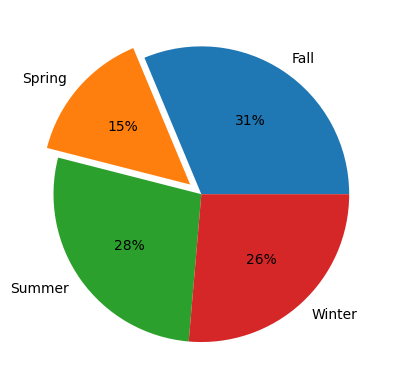

In [18]:
plot_season(df_merge)

Bisa dilihat pada grafik bahwa pengendara sepeda cenderung tidak mau bersepeda pada musim semi

#### Pertanyaan 3: `At what time do bike rentals peak??`

In [19]:
def plot_hour(df:pd.DataFrame, col='cnt'):
  df = df.copy()
  df = df.groupby('hr').mean(numeric_only=True)[col]

  sns.lineplot(df)

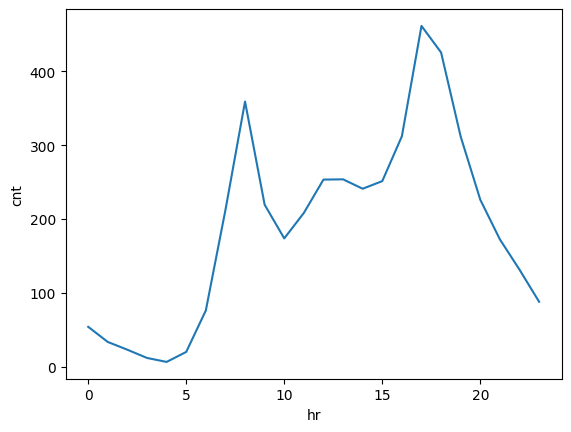

In [20]:
plot_hour(df_merge, col='cnt')

Dari grafik ini dapat terlihat bahwa pengendara banyak menggunakan sepeda pada sekitar 8-9 pagi dan pada jam 18-19 malam. Hal ini mungkin berkaita dengan jam pulang-pergi umum masyarakat ketika bekerja.

#### Pertanyaan 4 : `What is the trend of the casual users and registered users percentage?`

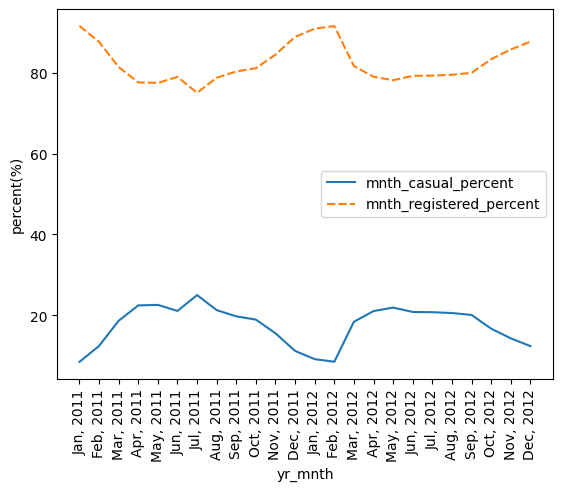

In [29]:
def plot_user_mode(df:pd.DataFrame):
  df = df.copy()

  df['casual_percent'] = df['casual'] / df['cnt'] * 100
  df['registered_percent'] = df['registered'] / df['cnt'] * 100

  df_casual_monthly =  plot_monthly(df, col='casual_percent', return_df=True)
  df_registered_monthly =  plot_monthly(df, col='registered_percent', return_df=True)

  df_result =  pd.concat([df_casual_monthly, df_registered_monthly], axis=1).drop_duplicates()

  ax = sns.lineplot(df_result)
  ax.tick_params(axis='x', rotation=90)
  ax.set_ylabel('percent(%)')

plot_user_mode(df_day)

Bisa dilihat bahwa trend pengguna casual dan registered cukup stagnan dalam beberapa bulan. Tidak ada perubahan signifikan.

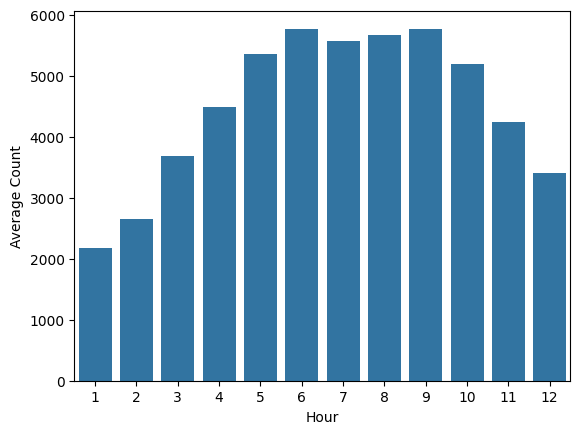

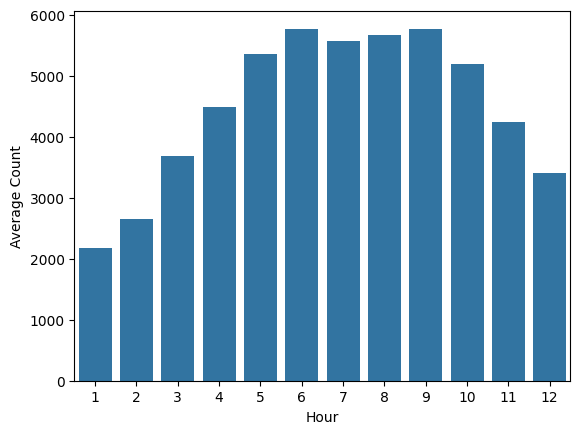

In [11]:
def group_bar(df:pd.DataFrame, by='hr', col='cnt'):
  df = df.copy()
  df = df.groupby(by).mean(numeric_only=True)[col]
  
  plot = sns.barplot(df)
  plot.set_xlabel("Hour")
  plot.set_ylabel("Average Count")

  return plot.figure

group_bar(df_day, by='mnth')

## Conclusion

- Conclusion pertanyaan 1 : Jumlah penyewa sepeda pada tahun 2012 meningkat dari tahun sebelumnya. Tren peminjam selalu menurun ketika menuju akhir tahun pada bulan desemebr
- Conclusion pertanyaan 2 : Sangat sedikit orang yang ingin menyewa sepeda pada musim semi. Hal ini mungkin berkaitan dengan poin pertanyaan satu bahwa menjelang akhir tahun banyak kantor atau sekolah yang diliburkan. Musim yang paling banyak orang meminjam sepeda adalah musim gugur
- Conclusion pertanyaan 3 : Jumlah penyewa sepeda mencapai puncaknya pada jam sore sekitar jam 16.00 hingga 19.00. Jam 8-9 pagi juga menjadi puncak dari penyewa sepeda, hal ini mungkin berkaitan dengan jam pulang pergi orang kantor.
- Conclusion pertanyaan 4 : Jumlah persentase penyewa yang telah mendaftarkan diri selalu jauh lebih banyak dari penyewa kasual. Tren yang ditampilkan cukup konstan